# Sesiunea 15 – NumPy Avansat
_Notebook de exerciții (fără soluții)._

### Exercițiul 1: Normalizare folosind broadcasting
Creează un array bidimensional cu 5 coloane și normalizează fiecare coloană folosind **broadcasting** (fără bucle explicite).

In [ ]:
import numpy as np
# global normalization

array = np.random.randint(0, 21, size=(5, 5))

low = array.min()
high = array.max()
narr = (array - low) / (high - low)

narr = narr.round(2)
narr

array([[0.35, 0.3 , 0.45, 0.55, 0.5 ],
       [0.25, 0.5 , 0.15, 0.8 , 0.55],
       [0.55, 1.  , 0.1 , 0.25, 0.45],
       [0.5 , 0.5 , 1.  , 0.  , 0.95],
       [0.2 , 0.75, 0.4 , 0.  , 0.1 ]])

In [ ]:
import numpy as np
# per collumn normalization

array = np.random.randint(0, 21, size=(5, 5)).astype(float)

low  = array.min(axis=0, keepdims=True)
high = array.max(axis=0, keepdims=True)
narr = (array - low) / (high - low)

narr = narr.round(2)
narr

array([[0.56, 0.  , 1.  , 0.26, 0.  ],
       [0.  , 1.  , 0.86, 0.11, 0.4 ],
       [1.  , 0.09, 1.  , 1.  , 1.  ],
       [0.78, 0.18, 0.  , 0.  , 0.2 ],
       [0.72, 0.27, 1.  , 0.37, 0.2 ]])

### Exercițiul 2: Rezolvarea unui sistem de ecuații liniare
Rezolvă un sistem de **3 ecuații liniare** folosind `np.linalg.solve`. Verifică soluția obținută prin substituție în ecuații.

In [19]:
import numpy as np

A = np.array([
    [2, -1, 3],
    [1,  1, 1],
    [3,  2, 4]
])

b = np.array([5, 6, 10])

x = np.linalg.solve(A, b)

print(x)
np.allclose(A @ x, b)

[15.  -0.5 -8.5]


True

### Exercițiul 3: Model simplu de neuron cu activare ReLU
Scrie un **model simplu de neuron** care calculează ieșirea ca `relu(w·x + b)`, folosind `np.maximum` pentru ReLU și vectorizare completă.

In [ ]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def neuron(w, x, b):
    z = np.dot(w, x) + b
    return relu(z)

x = np.array([2.0, -1.0, 3.0])   # input features
w = np.array([0.5, 0.2, -0.3])   # learned weights
b = 0.1                          # bias

output = neuron(w, x, b)
print(output)

X = np.random.randn(5, 3)   # 5 samples, 3 features each
outputs = np.maximum(0, X @ w + b)
print(outputs)

1.3877787807814457e-16
[0.         0.36977348 0.         0.         0.67994552]


### Exercițiul 4: Funcția sigmoid aplicată pe date aleatoare
Creează o funcție **sigmoid(x)** și aplic-o pe un **dataset aleator de 100 de valori** generate cu `np.random.randn()`.

[-0.94308515  0.19243594 -1.19739039  0.56335076  0.26522274  1.47619752
  0.59873411  1.83371095  1.37500524  0.02535766]
[0.28027758 0.54796107 0.23193978 0.63722749 0.56591972 0.81399755
 0.64536664 0.86220321 0.79818762 0.50633907]


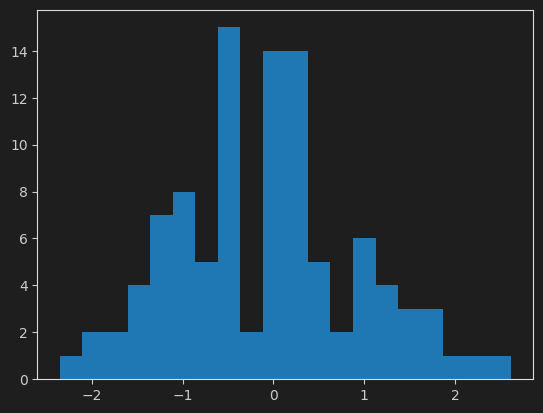

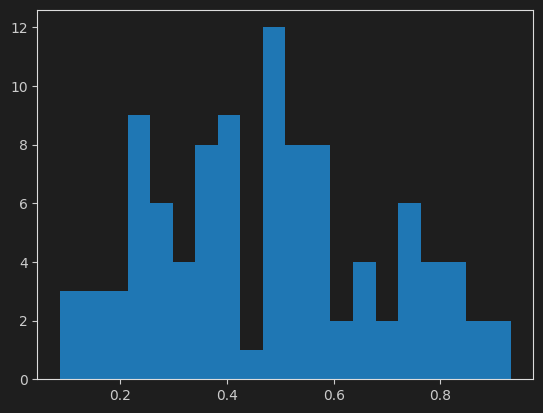

In [35]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

data = np.random.randn(100)
print(data[:10])

result = sigmoid(data)
print(result[:10])

import matplotlib.pyplot as plt

plt.rcParams.update({
    "axes.facecolor": "#1e1e1e",   # VS Code editor background
    "figure.facecolor": "#1e1e1e",
    "axes.edgecolor": "#DDDDDD",
    "axes.labelcolor": "#DDDDDD",
    "xtick.color": "#CCCCCC",
    "ytick.color": "#CCCCCC",
    "text.color": "#DDDDDD",
    "grid.color": "#3a3a3a",       # subtle dark grid
    "legend.edgecolor": "#1e1e1e",
    "legend.facecolor": "#2d2d30"
})

plt.hist(data, bins=20)
plt.show()
plt.hist(result, bins=20)
plt.show()

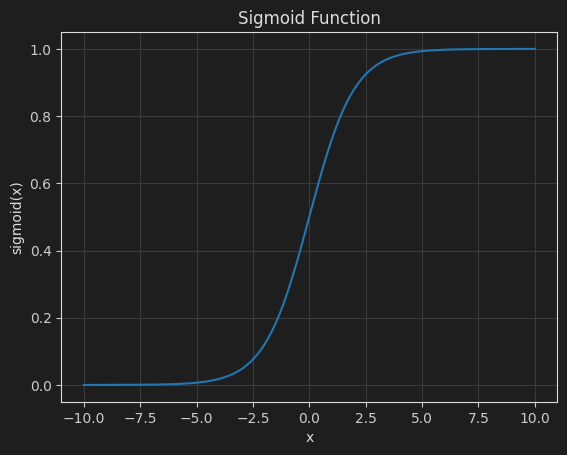

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 200)  # range of values
y = sigmoid(x)

import matplotlib.pyplot as plt

plt.rcParams.update({
    "axes.facecolor": "#1e1e1e",   # VS Code editor background
    "figure.facecolor": "#1e1e1e",
    "axes.edgecolor": "#DDDDDD",
    "axes.labelcolor": "#DDDDDD",
    "xtick.color": "#CCCCCC",
    "ytick.color": "#CCCCCC",
    "text.color": "#DDDDDD",
    "grid.color": "#3a3a3a",       # subtle dark grid
    "legend.edgecolor": "#1e1e1e",
    "legend.facecolor": "#2d2d30"
})

plt.plot(x, y)
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.grid(True)
plt.show()

### Exercițiul 5: Rețea cu 2 straturi complet vectorizată
Simulează o **rețea neuronală cu 2 straturi**, folosind doar operații vectorizate (`np.dot`, funcții de activare, broadcasting).

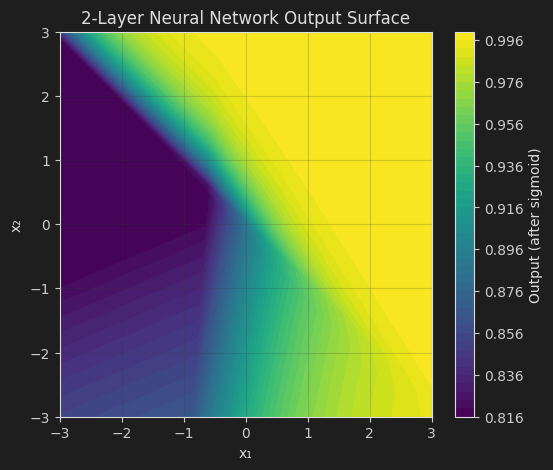

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# --- Activation functions ---
def relu(x):
    """ReLU activation: outputs x if positive, else 0."""
    return np.maximum(0, x)

def sigmoid(x):
    """Sigmoid activation: compresses values to (0, 1)."""
    return 1 / (1 + np.exp(-x))

# --- Network setup ---
np.random.seed(0)

# Input layer (2 features) → Hidden layer (4 neurons)
W1 = np.random.randn(2, 4)
b1 = np.random.randn(1, 4)

# Hidden layer → Output layer (1 neuron)
W2 = np.random.randn(4, 1)
b2 = np.random.randn(1, 1)

# --- Generate grid of (x1, x2) points ---
x1 = np.linspace(-3, 3, 200)
x2 = np.linspace(-3, 3, 200)
X1, X2 = np.meshgrid(x1, x2)
X = np.column_stack([X1.ravel(), X2.ravel()])

# --- Forward pass (fully vectorized) ---
hidden = relu(X @ W1 + b1)
output = sigmoid(hidden @ W2 + b2)
Z = output.reshape(X1.shape)


# --- Matplotlib dark theme settings ---
plt.rcParams.update({
    "axes.facecolor": "#1e1e1e",
    "figure.facecolor": "#1e1e1e",
    "axes.edgecolor": "#DDDDDD",
    "axes.labelcolor": "#DDDDDD",
    "xtick.color": "#CCCCCC",
    "ytick.color": "#CCCCCC",
    "text.color": "#DDDDDD",
    "grid.color": "#3a3a3a",
    "legend.edgecolor": "#1e1e1e",
    "legend.facecolor": "#2d2d30"
})

# --- Plot output surface ---
plt.figure(figsize=(6, 5))
contour = plt.contourf(X1, X2, Z, levels=50, cmap="viridis")
plt.colorbar(contour, label="Output (after sigmoid)")
plt.title("2-Layer Neural Network Output Surface")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.grid(True, alpha=0.2)
plt.show()